In [13]:
import geopandas
import matplotlib.pyplot as plt
import pandas as pd

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
df = pd.read_csv('nuclear-primary-energy.csv')

world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world.columns = ['pop_est', 'continent', 'name', 'Code', 'gdp_md_est', 'geometry']

df = df[df['Year'] == 2019]

merge = pd.merge(world, df, on='Code', how="left", left_on=None)
result = merge.drop(['continent', 'name', 'gdp_md_est', 'pop_est'], axis=1)

worldTotal = pd.read_csv('nuclear-primary-energy.csv')
worldTotal = worldTotal[worldTotal['Entity'] == 'World']
worldTotal = worldTotal.drop(['Code', 'Entity'], axis=1)

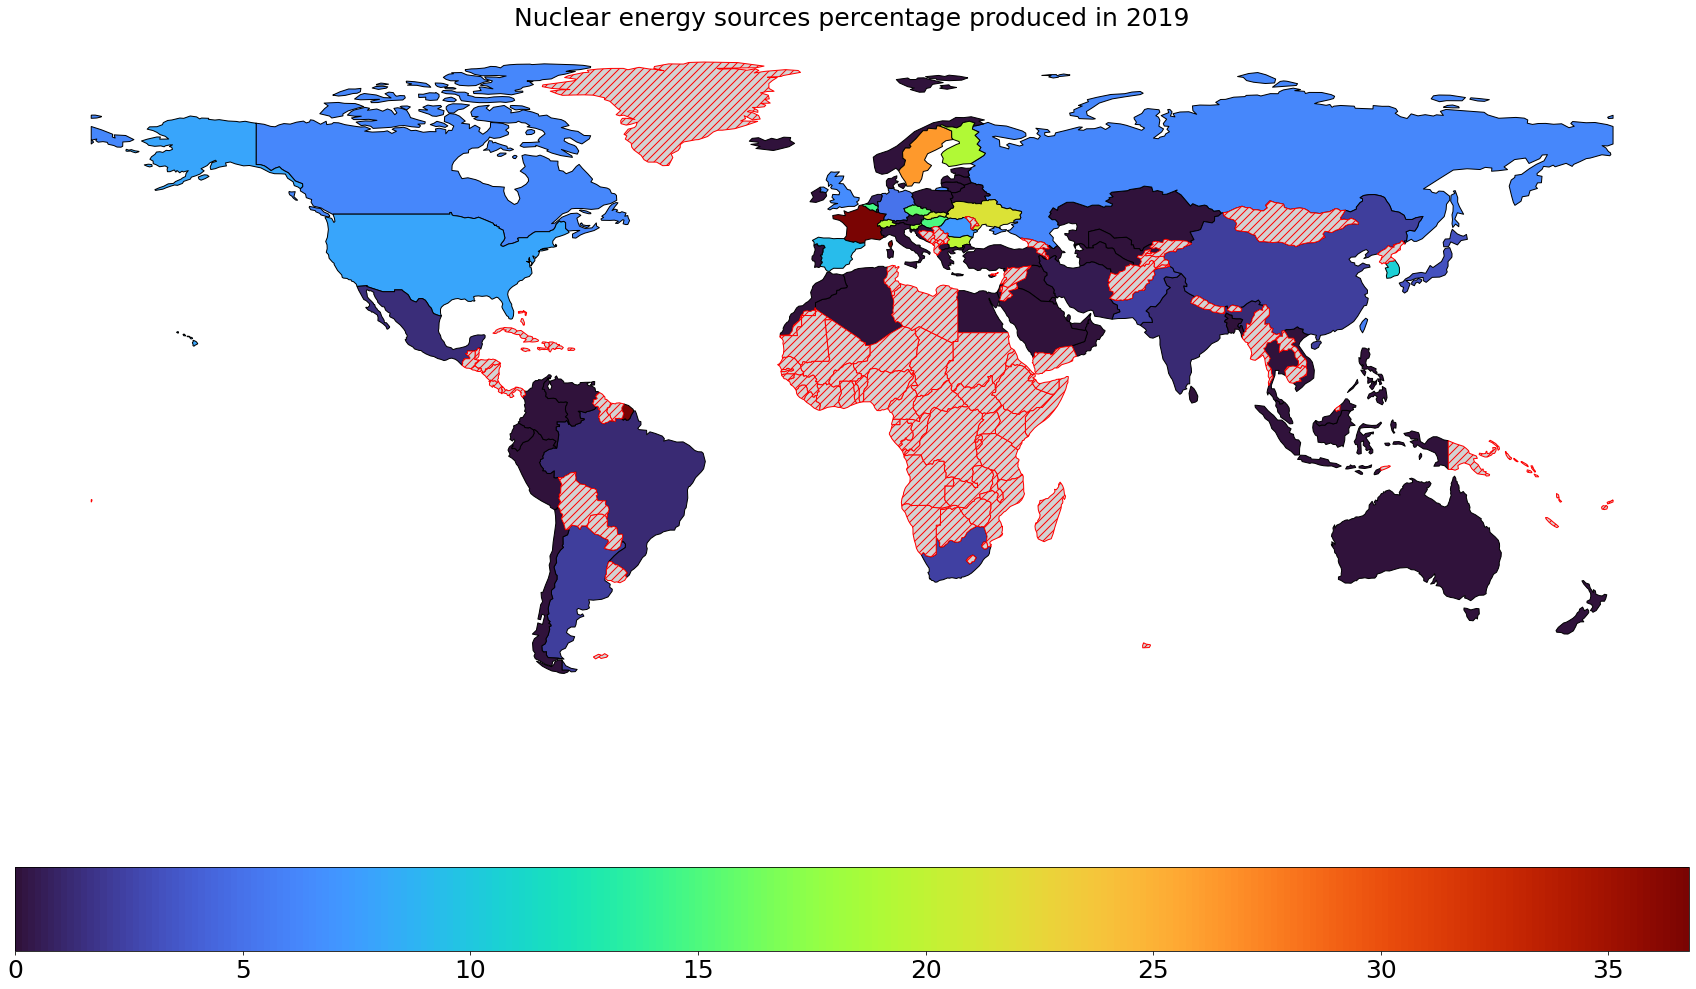

In [5]:
fig, axis = plt.subplots(1, figsize=(30,20))
result.plot(ax=axis, column='Nuclear (% sub energy)', legend=True, 
            legend_kwds={'orientation': "horizontal"}, 
            cmap='turbo', edgecolor='black',
            missing_kwds={"color": "lightgrey",
                          "edgecolor": "red",
                          "hatch": "///",
                          "label": "Missing values"})
plt.title("Nuclear energy sources percentage produced in 2019", fontsize=25)
axis.set_axis_off();

fig = axis.figure
cb = fig.axes[1]
cb.tick_params(labelsize=25)

plt.savefig('Share of energy from nuclear sources in 2019.jpg', dpi=300, bbox_inches='tight')
plt.show()

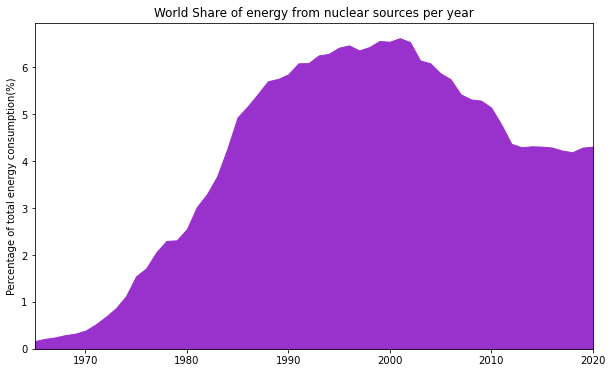

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.stackplot(worldTotal['Year'], worldTotal['Nuclear (% sub energy)'], color='darkorchid')
plt.margins(x=0)
ax.set_title('World Share of energy from nuclear sources per year')
ax.set_ylabel('Percentage of total energy consumption(%)')
plt.savefig('Share of energy from nuclear sources by years (scale error).jpg', dpi=300, bbox_inches='tight')
plt.show()

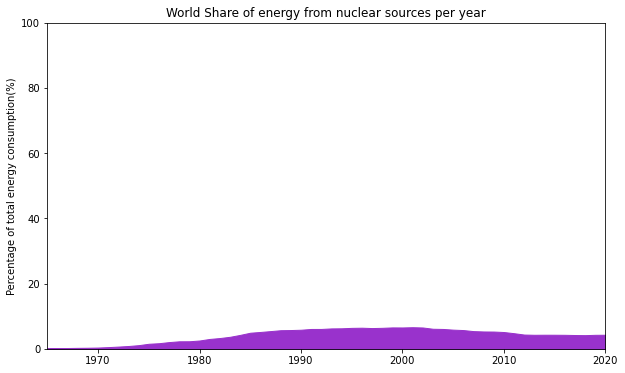

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.stackplot(worldTotal['Year'], worldTotal['Nuclear (% sub energy)'], color='darkorchid')
ax.set_ylim(ymin=0, ymax=100)
plt.margins(x=0)
ax.set_title('World Share of energy from nuclear sources per year')
ax.set_ylabel('Percentage of total energy consumption(%)')
plt.savefig('Share of energy from nuclear sources by years.jpg', dpi=300, bbox_inches='tight')
plt.show()